In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import rcParams
from datetime import datetime

In [32]:
#dataset = pd.DataFrame({'month':['1960-08-01','1960-09-01','1960-10-01','1960-11-01','1960-12-01','1960-13-01','1960-14-01','1960-15-01','1960-16-01','1960-17-01','1960-18-01','1960-19-01','1960-20-01'],'passengers':[606,508,461,390,432,432,344,343,345,346,347,433,234]})
dataset = pd.read_excel('incs.xlsx')

In [48]:
dataset.head()

,createdate,inccount
0,2018-11-21,67
1,2018-11-22,55
2,2018-11-23,32
3,2018-11-24,30
4,2018-11-25,20


In [35]:
indexeddataset=dataset.set_index(dataset.createdate)

In [49]:
indexeddataset.head()

,inccount
createdate,
2018-11-21,67
2018-11-22,55
2018-11-23,32
2018-11-24,30
2018-11-25,20


In [37]:
indexeddataset=indexeddataset.drop(['createdate'],axis = 1)

In [50]:
indexeddataset.head()

,inccount
createdate,
2018-11-21,67
2018-11-22,55
2018-11-23,32
2018-11-24,30
2018-11-25,20


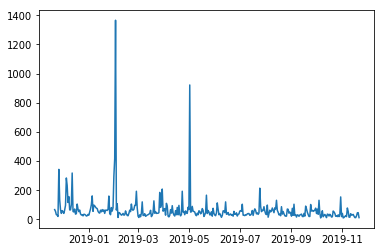

In [39]:
plt.plot(indexeddataset.index,indexeddataset.inccount)

In [51]:
rollingmean=indexeddataset.rolling(window=12).mean()
rollingmean.head()

,inccount
createdate,
2018-11-21,NaN
2018-11-22,NaN
2018-11-23,NaN
2018-11-24,NaN
2018-11-25,NaN


In [52]:
rollingstd=indexeddataset.rolling(window=12).std()
rollingstd.head()

,inccount
createdate,
2018-11-21,NaN
2018-11-22,NaN
2018-11-23,NaN
2018-11-24,NaN
2018-11-25,NaN


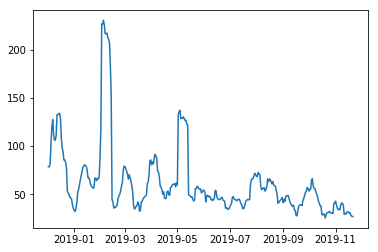

In [42]:
plt.plot(rollingmean)

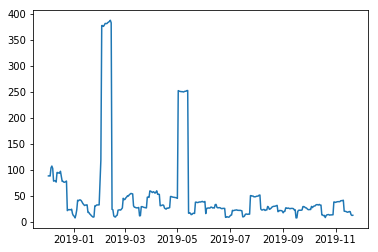

In [43]:
plt.plot(rollingstd)

In [44]:
from statsmodels.tsa.stattools import adfuller

In [46]:
dftest = adfuller(indexeddataset['inccount'], autolag='AIC')

In [47]:
dfoutput = pd.Series(dftest[0:4], index=['Test statistic','p-value','#Lags Used','Number observations used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value(%s)'%key] = value
dfoutput

Test statistic             -1.061617e+01
p-value                     5.667544e-19
#Lags Used                  1.000000e+00
Number observations used    3.640000e+02
Critical Value(1%)         -3.448443e+00
Critical Value(5%)         -2.869513e+00
Critical Value(10%)        -2.571018e+00
dtype: float64

In [53]:
indexeddataset_logScale = np.log(indexeddataset)

In [55]:
indexeddataset_logScale.head()

,inccount
createdate,
2018-11-21,4.204693
2018-11-22,4.007333
2018-11-23,3.465736
2018-11-24,3.401197
2018-11-25,2.995732


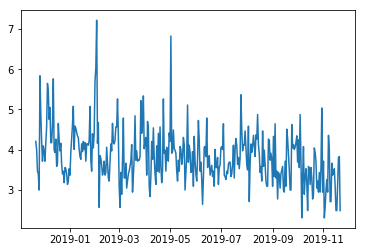

In [56]:
plt.plot(indexeddataset_logScale)

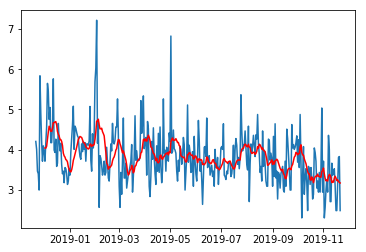

In [57]:
movingAverage = indexeddataset_logScale.rolling(window=12).mean()
plt.plot(indexeddataset_logScale)
plt.plot(movingAverage, color='red')

In [58]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexeddataset_logScale)

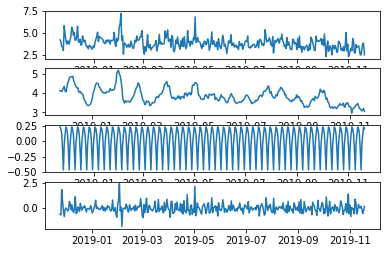

In [67]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexeddataset_logScale, label='Original')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.subplot(414)
plt.plot(residual, label='Residuals')

In [68]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)

In [ ]:
acf pacf

In [70]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(indexeddataset_logScale, order=(2,1,2))
results_AR = model.fit(disp=1)
plt.plot(results_AR.fittedValues, color='red')

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


LinAlgError: SVD did not converge

In [71]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(indexeddataset_logScale, order=(0,1,2))
results_AR = model.fit(disp=1)
plt.plot(results_AR.fittedValues, color='red')

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


AttributeError: 'ARIMAResults' object has no attribute 'fittedValues'

In [76]:
model = ARIMA(indexeddataset_logScale, order=(2,1,2))
results_ARIMA = model.fit(disp=1)
plt.plot(results_AR.fittedValues, color='red')

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


LinAlgError: SVD did not converge

In [77]:
results_ARIMA.plot_predict(1,200)
x = results_ARIMA.forecast(steps=120)

NameError: name 'results_ARIMA' is not defined